## YOLOv8

In [ ]:
from ipynb.fs.full.general_functions import *
from ultralytics import YOLO
import ipynb.fs.full.methods_names as methods


class YoloV8Models:
    model_v1 = None
    model_v2 = None
    model_v3 = None
    model_v4 = None
    #dataset novo
    model_v5 = None
    model_v6 = None
    
    def load(trainVersion):
        if (trainVersion == 1):
            f = "v1-best-yolov8-newdataset-v2-300-seg.pt"
            if (YoloV8Models.model_v1 == None):
                print("Carrega "+f)
                YoloV8Models.model_v1 = YoloV8Models.__load(f)
            else:
                print("Usando "+f)
            return YoloV8Models.model_v1
        
        elif (trainVersion == 2):
            f = "v2-best-384-14h.pt"
            if (YoloV8Models.model_v2 == None):
                print("Carrega "+f)
                YoloV8Models.model_v2 = YoloV8Models.__load(f)
            else:
                print("Usando "+f)
            return YoloV8Models.model_v2
        
        elif (trainVersion == 3):
            f = "v3-best-416.pt"
            if (YoloV8Models.model_v3 == None):
                print("Carrega "+f)
                YoloV8Models.model_v3 = YoloV8Models.__load(f)
            else:
                print("Usando "+f)
            return YoloV8Models.model_v3
        
        elif (trainVersion == 4):
            f = "v4-4days-512.pt"
            if (YoloV8Models.model_v4 == None):
                print("Carrega "+f)
                YoloV8Models.model_v4 = YoloV8Models.__load(f)
            else:
                print("Usando "+f)
            return YoloV8Models.model_v4
    
        elif (trainVersion == 5):
            f = "v5-1week-512.pt"
            if (YoloV8Models.model_v5 == None):
                print("Carrega "+f)
                YoloV8Models.model_v5 = YoloV8Models.__load(f)
            else:
                print("Usando "+f)
            return YoloV8Models.model_v5
        elif (trainVersion == 6):
            f = "v6-1day-416.pt"
            if (YoloV8Models.model_v6 == None):
                print("Carrega "+f)
                YoloV8Models.model_v6 = YoloV8Models.__load(f)
            else:
                print("Usando "+f)
            return YoloV8Models.model_v6
        
    def __load(file):
        if os.path.isfile("./yolov8/%s" % file):
            return YOLO("./yolov8/%s" % file)
        else:
            return YOLO("./segmentation_methods/yolov8/%s" % file)


def yolov8_method(path, validation_type, mark_parasites=True, trainVersion = 5):
    """
    Returns: (img, cell_mask_colored), (cells, internal, external, passTime)
    """
    
    if (trainVersion == 1):
        name = methods.YOLOv1
    elif (trainVersion == 2):
        name = methods.YOLOv2
    elif (trainVersion == 3):
        name = methods.YOLOv3
    elif (trainVersion == 4):
        name = methods.YOLOv4
    elif (trainVersion == 5):
        name = methods.YOLOv5
    elif (trainVersion == 6):
        name = methods.YOLOv6
    else:
        print("Versao invalida")
        
    method_ext = name
    
    start = time.time()
    
    #read in colors
    img = get_image(path=path,mode=1)
    
    model = YoloV8Models.load(trainVersion)
    
    results = model(path, conf=0.5 )
    
    #mark
    res = results[0]
    for box in res.boxes.xywhn:
        x,y,w,h = box
        
        x, y = x * img.shape[1], y * img.shape[0]
        w, h = w * img.shape[1], h * img.shape[0]
        
        x,y,w,h = int(x),int(y),int(w),int(h)
        img = cv2.circle(img, (x,y), 5, (200,0,0), -1)
    
    
    #mask
    cells = 0
    if res.masks == None:
        print("Falha, nao criou mascara")
        return False
    
    
    cell_mask = np.zeros_like(np.asarray(res.masks.data[0].cpu()), dtype='bool')
    for mask in res.masks.data:
        cells += 1
        mask = np.asarray(mask.cpu(), dtype='bool')
        cell_mask = np.ma.mask_or(cell_mask, mask )

    cell_mask = cell_mask.astype(np.uint8)
    
    
    #hsv mask
    par_mask, par_mask_dilated = hsv_par_mask(img)

    
    #Marca os parasitas
    cell_mask = cv2.resize(cell_mask,(640,480))
    if mark_parasites:
        img, internal, external = parasites_mark(img, par_mask, cell_mask)
    else:
        internal, external = 0,0
        
    end = time.time()
    
    img = cv2.resize(img, (640,480))
    cell_mask = cv2.resize(cell_mask, (640,480))

    passTime = "%.2fs" % (end-start)

    #save results
    save_results(path,name,cells,internal,external, passTime, img, method_ext, validation_type)
    
    return (img, cell_mask), (cells, internal, external, passTime)


if __name__ == '__main__':
    #PATH = "./PHOTOS_MALARIA_VHIR_UPC/fotos_2015_12_01/P_falciparum/Trofozoits/DSCN0083.JPG"
    #PATH = "../blood_samples/samples/blood_smear_2.JPG"
    #PATH = "../blood_samples/samples/blood_smear_15.JPG"
    #PATH = "../blood_samples/samples/blood_smear_14.JPG"
    #PATH = '../blood_samples/samples/blood_smear_3.JPG'
    PATH = '../blood_samples/samples/blood_smear_8.JPG'
    images, stats = yolov8_method(PATH, NO_VALIDATION, mark_parasites=True, trainVersion = 5)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()

Carrega v5-1week-512.pt



image 1/1 C:\Users\alan_\Desktop\doc\pid-course-project\segmentation_methods\..\blood_samples\samples\blood_smear_8.JPG: 384x512 145 red blood cells, 56.0ms
Speed: 3.0ms preprocess, 56.0ms inference, 45.0ms postprocess per image at shape (1, 3, 512, 512)


Usando v5-1week-512.pt


image 1/1 C:\Users\alan_\Desktop\doc\pid-course-project\segmentation_methods\..\blood_samples\samples\blood_smear_3.JPG: 384x512 67 red blood cells, 248.0ms
Speed: 3.0ms preprocess, 248.0ms inference, 29.0ms postprocess per image at shape (1, 3, 512, 512)


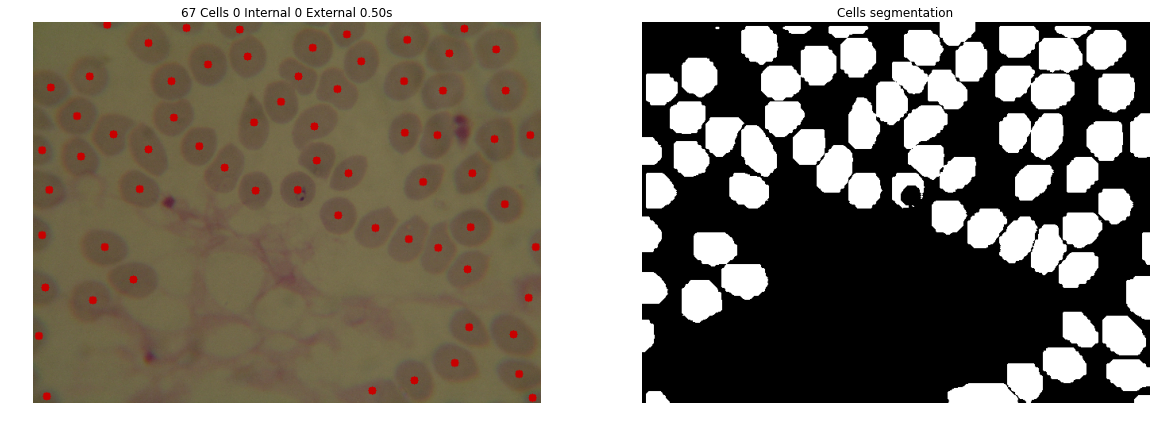

In [2]:
if __name__ == '__main__':
    #PATH = "./PHOTOS_MALARIA_VHIR_UPC/fotos_2015_12_01/P_falciparum/Trofozoits/DSCN0083.JPG"
    #PATH = "../blood_samples/samples/blood_smear_2.JPG"
    #PATH = "../blood_samples/samples/blood_smear_15.JPG"
    #PATH = "../blood_samples/samples/blood_smear_14.JPG"
    PATH = '../blood_samples/samples/blood_smear_3.JPG'
    images, stats = yolov8_method(PATH, NO_VALIDATION, mark_parasites=True, trainVersion = 5)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()

Carrega v3-best-416.pt


image 1/1 C:\Users\alan_\Desktop\doc\pid-course-project\segmentation_methods\..\blood_samples\samples\blood_smear_15.JPG: 320x416 112 cells, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 13.0ms postprocess per image at shape (1, 3, 416, 416)


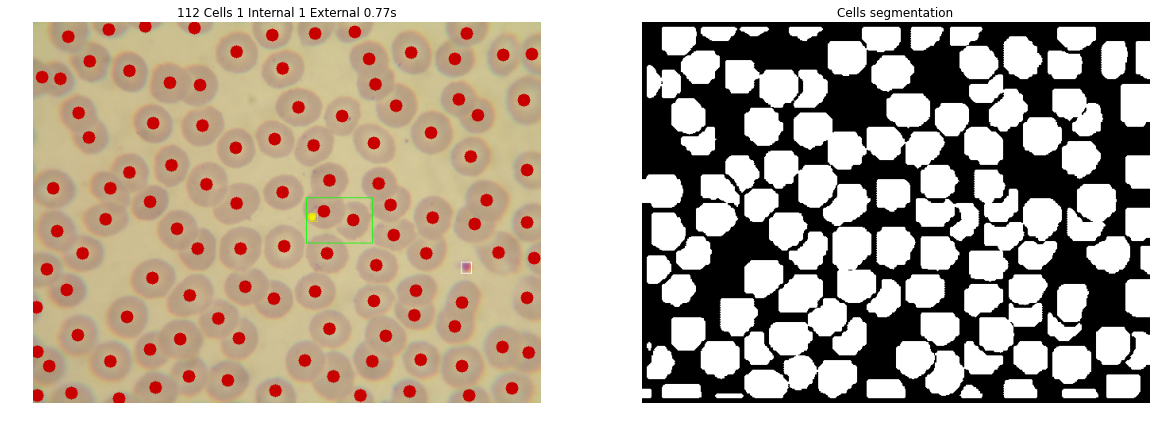

In [3]:
if __name__ == '__main__':
    #PATH = "./PHOTOS_MALARIA_VHIR_UPC/fotos_2015_12_01/P_falciparum/Trofozoits/DSCN0083.JPG"
    #PATH = "../blood_samples/samples/blood_smear_2.JPG"
    PATH = "../blood_samples/samples/blood_smear_15.JPG"
    #PATH = "../blood_samples/samples/blood_smear_14.JPG"
    #PATH = '../blood_samples/samples/blood_smear_3.JPG'
    images, stats = yolov8_method(PATH, NO_VALIDATION, mark_parasites=True, trainVersion = 3)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()

Carrega v4-4days-512.pt



image 1/1 C:\Users\alan_\Desktop\doc\pid-course-project\segmentation_methods\..\blood_samples\samples\blood_smear_15.JPG: 384x512 112 cells, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 14.0ms postprocess per image at shape (1, 3, 512, 512)


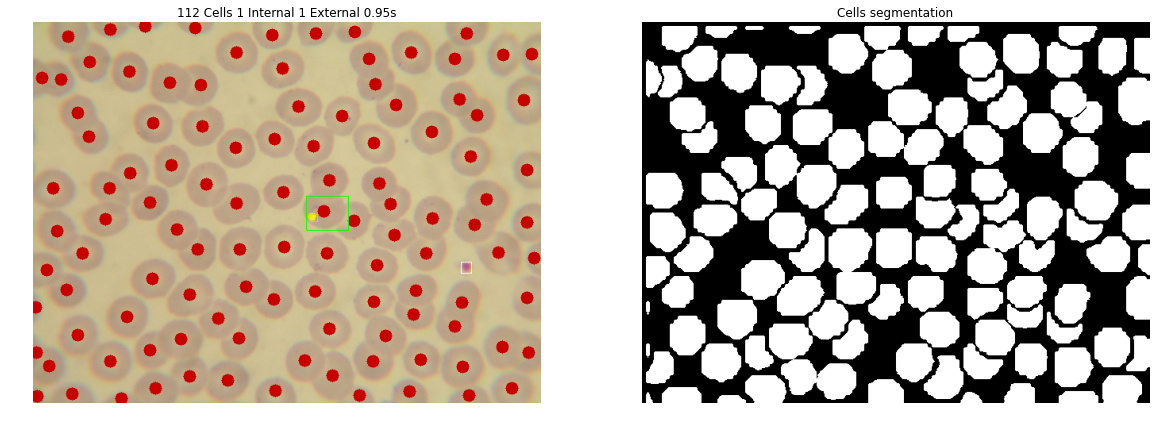

In [4]:
if __name__ == '__main__':
    #PATH = "./PHOTOS_MALARIA_VHIR_UPC/fotos_2015_12_01/P_falciparum/Trofozoits/DSCN0083.JPG"
    #PATH = "../blood_samples/samples/blood_smear_2.JPG"
    PATH = "../blood_samples/samples/blood_smear_15.JPG"
    #PATH = "../blood_samples/samples/blood_smear_14.JPG"
    #PATH = '../blood_samples/samples/blood_smear_3.JPG'
    images, stats = yolov8_method(PATH, NO_VALIDATION, mark_parasites=True, trainVersion = 4)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()